# Introduction

The RMS Titanic, a British passenger liner that set sail on its maiden voyage from Southampton to New York City in April 1912, is an iconic vessel forever remembered for its tragic fate. On the night of April 15, 1912, the Titanic struck an iceberg and sank, resulting in the loss of over 1,500 lives. This catastrophic event remains a subject of historical interest and a symbol of human hubris.

The "Titanic - Machine Learning from Disaster" dataset is one of the most well-known datasets in the field of data science and machine learning. It provides a comprehensive record of passengers on board the Titanic, including their personal information, such as name, age, gender, class, fare, cabin, and whether they survived or not. This dataset offers a unique opportunity to explore and analyze historical data to gain insights into the factors that influenced survival rates.

The dataset is frequently used in machine learning and data science competitions on Kaggle, a popular platform for data analysis and predictive modeling. The Kaggle competition associated with this dataset challenges data scientists to build predictive models to determine the likelihood of passenger survival based on various attributes. In this report, we will address the following research questions:

1. Did Passenger Class Affect Survival Rates?
2. What Role Did Gender Play in Survival?
3. How Did Age Impact Survival on the Titanic?
4. Did Family Size Influence Survival?
5. Were There Geographic Differences in Survival Rates?
6. What Insights Can We Gain from Cabin Location?

In addition to answering these questions, we will also explore machine learning techniques to predict survival and consider clustering and visualization approaches to gain a deeper understanding of the dataset.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats


C:\Users\jelle\OneDrive - ROCvA, ROCvF en VOvA\projecten\Kaggle-Titanic\venv\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\jelle\OneDrive - ROCvA, ROCvF en VOvA\projecten\Kaggle-Titanic\venv\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\jelle\AppData\Local\Temp\ipykernel_3

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data cleaning

In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.drop(["Cabin"], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
mean_age = train["Age"].mean().round(1)
train = train.fillna(mean_age)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# feature engineering

making age groups to use later in some visuals.

i will use the following age groups:

**Infants and Toddlers**: Age 0-2 years old.

**Children**: Age 3-12 years old.

**Adolescents**: Age 13-18 years old.

**Young Adults**: Age 19-30 years old.

**Adults**: Age 31-60 years old.

**Seniors**: Age 61 and older.

In [12]:
train.loc[(train["Age"] >= 0.0) & (train["Age"] <= 2.0), "Age_Group"] = "Infants and Toddlers"
train.loc[(train["Age"] >= 3.0) & (train["Age"] <= 12.0), "Age_Group"] = "Children"
train.loc[(train["Age"] >= 13.0) & (train["Age"] <= 18.0), "Age_Group"] = "Adolescents"
train.loc[(train["Age"] >= 19.0) & (train["Age"] <= 30.0), "Age_Group"] = "Young Adults"
train.loc[(train["Age"] >= 31.0) & (train["Age"] <= 60.0), "Age_Group"] = "Adults"
train.loc[(train["Age"] >= 61.0), "Age_Group"] = "Seniors"

train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Famaly_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.7,S,Young Adults,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.7,S,Young Adults,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.7,S,Adults,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,29.7,S,Young Adults,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,29.7,S,Young Adults,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adults,1


Making a new column called `Family_size` to use later in some visuals.

the column is created by doing `SibSp` + `Parch` + 1

the column `SibSp` is the column that says how much Siblings/Spouses where aboard

the column `Parch` is the column that says how much Parents/Children where aboard

i add + 1 to it because the person i calculate it for is also in the family

In [16]:
train["Famaly_size"] = train["SibSp"] + train["Parch"] + 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Famaly_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.7,S,Young Adults,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.7,S,Young Adults,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.7,S,Adults,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,29.7,S,Young Adults,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,29.7,S,Young Adults,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adults,1


Titles can provide insights into a passenger's social status or class. For example, "Mr" is typically associated with adult males, "Mrs" with married women, "Miss" with unmarried women, and "Master" with young boys.

Titles can also indicate a passenger's marital status. "Mr" and "Mrs" suggest married individuals, while "Miss" typically represents unmarried women.

Titles may be correlated with a passenger's likelihood of survival. For instance, during the Titanic disaster, women and children were often given priority in accessing lifeboats. Therefore, knowing the title of a passenger may provide additional context for modeling survival probabilities.

all the titles in the column `Name` end with a dot at the end so i am using RegEx to find the title before the dot

In [18]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Famaly_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.7,S,Young Adults,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.7,S,Young Adults,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.7,S,Adults,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,29.7,S,Young Adults,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,29.7,S,Young Adults,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adults,1,Mr


# EDA (Exploratory Data Analysis)

In [44]:
columns = list(train.columns.values)
number_columns = ["Age", "Fare", "Famaly_size"]

In [36]:
column1 = "Age"
Age_Mean = train[column1].mean()
print(f"the Average value for the column {column1} is: {Age_Mean}")
Age_Median = train[column1].median()
print(f"The median value for the column {column1} is: {Age_Median}")
Age_std = np.std(train[column1])
print(f"The standard deviation for the colum {column1} is: {Age_std}")
print("\n")

column2 = "Fare"
Fare_Mean = train[column2].mean()
print(f"the Average value for the column {column2} is: {Fare_Mean}")
Fare_Median = train[column2].median()
print(f"The median value for the column {column2} is: {Fare_Median}")
Fare_std = np.std(train[column2])
print(f"The standard deviation for the colum {column2} is: {Fare_std}")
print("\n")

column3 = "Famaly_size"
Famaly_size_Mean = train[column3].mean()
print(f"the Average value for the column {column3} is: {Famaly_size_Mean}")
Famaly_size_Median = train[column3].median()
print(f"The median value for the column {column3} is: {Famaly_size_Median}")
Famaly_size_std = np.std(train[column3])
print(f"The standard deviation for the colum {column3} is: {Famaly_size_std}")

the Average value for the column Age is: 29.69929292929293
The median value for the column Age is: 29.7
The standard deviation for the colum Age is: 12.994716877557776


the Average value for the column Fare is: 32.204207968574636
The median value for the column Fare is: 14.4542
The standard deviation for the colum Fare is: 49.6655344447741


the Average value for the column Famaly_size is: 1.904601571268238
The median value for the column Famaly_size is: 1.0
The standard deviation for the colum Famaly_size is: 1.6125528671095162


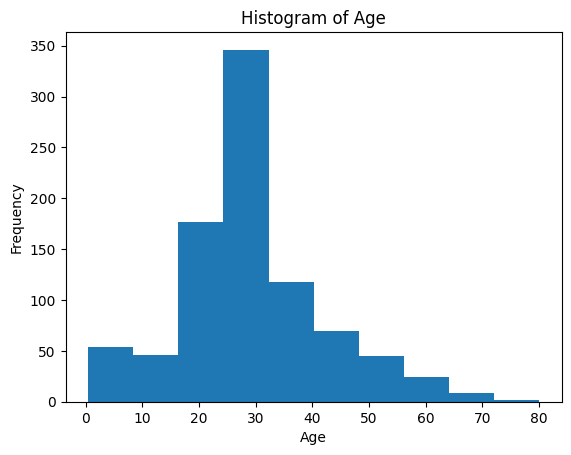

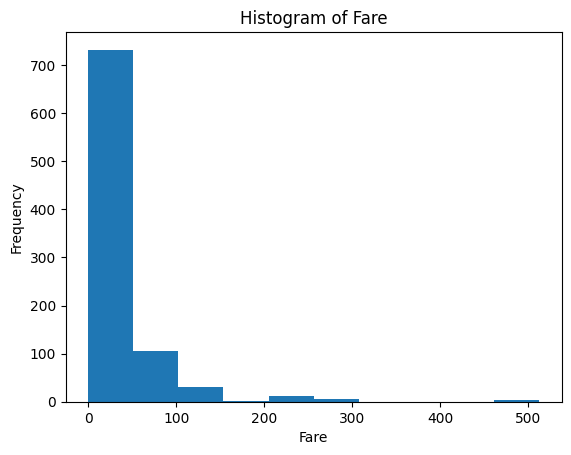

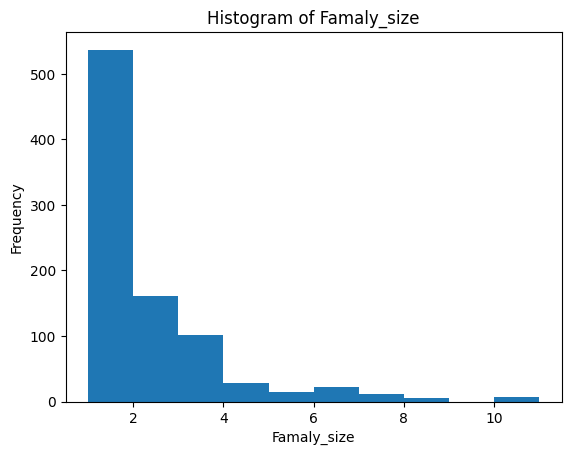

In [58]:
for column in number_columns:
    plt.figure()
    plt.hist(train[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')